In [2]:
import pandas as pd

df = pd.read_csv("faithful.csv")
print(df.columns)


Index(['eruptions', 'waiting'], dtype='object')


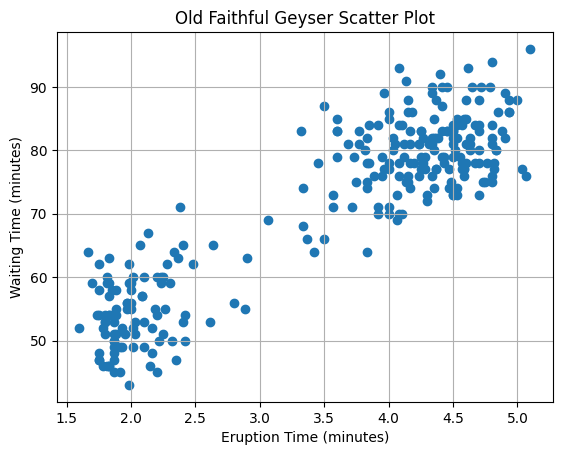

In [5]:
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("Old Faithful Geyser Scatter Plot")
plt.grid(True)
plt.show()



I observe **2 clusters** based on the scatter plot:
- One cluster has shorter eruptions and shorter wait times.
- Another cluster has longer eruptions and longer wait times.

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters.

- **Agglomerative**: Bottom-up approach that merges closest points
- **Divisive**: Top-down approach that splits clusters

Since the clusters in the plot are well-separated, hierarchical clustering is appropriate here.


In [7]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def compute_loss(X, centroids, labels):
    return sum(np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X)))


In [10]:
X = df[['eruptions', 'waiting']].values
k = 2  # Based on visual inspection

max_iter = 100
centroids = initialize_centroids(X, k)
losses = []

for _ in range(max_iter):
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, k)
    loss = compute_loss(X, new_centroids, labels)
    losses.append(loss)

    if np.allclose(centroids, new_centroids):  # convergence check
        break
    centroids = new_centroids

# Save final outputs
final_centroids = centroids
final_labels = labels


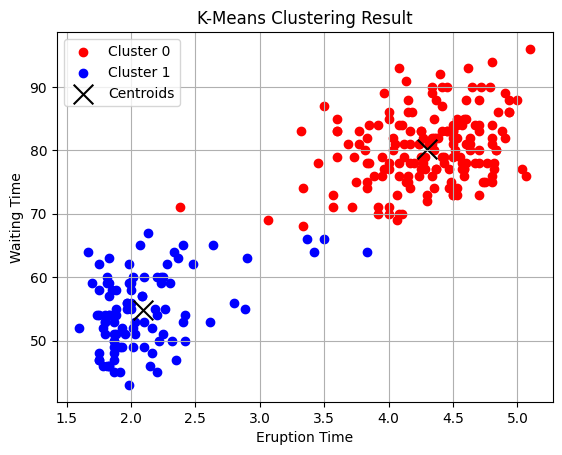

In [11]:
colors = ['red', 'blue']
for i in range(k):
    plt.scatter(X[final_labels == i, 0], X[final_labels == i, 1], c=colors[i], label=f'Cluster {i}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.title('K-Means Clustering Result')
plt.legend()
plt.grid(True)
plt.show()


This plot shows the results of K-Means clustering with k=2. The clusters are color-coded, and the centroids are marked with 'X'.

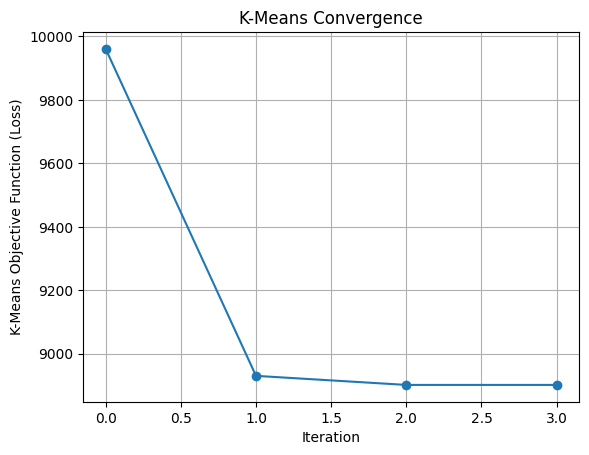

In [12]:
plt.plot(range(len(losses)), losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("K-Means Objective Function (Loss)")
plt.title("K-Means Convergence")
plt.grid(True)
plt.show()


This plot shows the convergence of the K-Means algorithm over iterations.  
The y-axis represents the loss (objective function), and the x-axis shows the iteration number.  
The decreasing curve indicates that the algorithm quickly found stable cluster centroids.